# Problem set #5
### by Alexander Tyan, February 18, 2018

## 1).
### a). Use a multinomial logistic regression model of the following form with the following linear predictor j for j = 1; 2 (the baseline class is j = 3)

In [237]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#%matplotlib inline
#%matplotlib notebook

In [238]:
# Import dataset as pandas df:
df = pd.read_csv("data/strongdrink.txt")

In [239]:
# We want alco, malic, tot_phen, and color_int as future independent vars, 
# cultivar as categorical response:
df = df[["cultivar", "alco", "malic", "tot_phen", "color_int"]]
# Check for missing values:
df.isnull().sum()

cultivar     0
alco         0
malic        0
tot_phen     0
color_int    0
dtype: int64

In [240]:
# Dependent/independent variables:
X = df[["alco", "malic", "tot_phen", "color_int"]]
y = df[["cultivar"]]

In [241]:
# 75% sample training set:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.25, random_state=20)

In [242]:
# Train to fit a multinomial logistic regression:
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
MultLogReg.fit(X_train, y_train)
# Predict response based on test indep. vars.:
y_pred = MultLogReg.predict(X_test)

/Users/alexander/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [243]:
print("Estimated Coefficients:")
print(MultLogReg.intercept_)
print(MultLogReg.coef_)

Estimated Coefficients:
[-24.01128406  22.80206034   1.20922372]
[[ 1.70042763 -0.26560802  1.22389493  0.02275095]
 [-1.46801436 -0.33305176  0.66400715 -0.92271029]
 [-0.23241342  0.5986597  -1.88790213  0.89995925]]


So estimated coefficients for j = 1: 

$\beta_{1,0} = -24.01128406$ 

$\beta_{1,1} = 1.70042763$

$\beta_{1,2} = -0.26560802$

$\beta_{1,3} = 1.22389493$

$\beta_{1,4} = 0.02275095$


So estimated coefficients for j = 2: 

$\beta_{2,0} = 22.80206034$ 

$\beta_{2,1} = -1.46801436$

$\beta_{2,2} = -0.33305176$

$\beta_{2,3} = 0.66400715$

$\beta_{2,4} = -0.92271029$


In [244]:
classification = classification_report(y_test, y_pred)
print(classification)
# Error rates:
print("Error Rates:")
# For cultivar 1:
print("Error rate for cultivar j = 1:", 1 - 0.87)
# For cultivar 2:
print("Error rate for cultivar j = 2:", 1 - 1)
# For cultivar 3:
print("Error rate for cultivar j = 3:", 1 - 1)

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

Error Rates:
Error rate for cultivar j = 1: 0.13
Error rate for cultivar j = 2: 0
Error rate for cultivar j = 3: 0


In [245]:
# See false positives/negatives:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[13,  0,  0],
       [ 2, 19,  0],
       [ 0,  0, 10]])

Between categories j = 1 and j = 2, category two is perfectly predicted and it does have the most observations. However, between j = 1, j = 2, and j = 3, both j = 2 and j = 3 are equal in precision (100% of true positives). However, j = 3 is the category that has better recall (true positives over all actual category two cases). So category 3 is predicted best and it is the one with the least observations (The category best predicted is not the one with the most observations.)

### b). Perform a leave-one-out cross validation (LOOCV) with the model from part (a).

In [246]:
# Indicator function:
def indicator(y_test_val, y_pred_val):
    """
    Indicator function, returns 1 if the predicted
    value is the same as the test value, 0 otherwise.
    y_test_val: integer
    y_pred_val: integer
    return: integer, 0 or 1
    """
    if y_test_val == y_pred_val:
        return 1
    else:
        return 0

In [247]:
# Separate into dependent/indepndent vars Numpy arrays:
Xvars = df[["alco", "malic", "tot_phen", "color_int"]].values
yvals = df[["cultivar"]].values

results_df = pd.DataFrame(columns=["y_test", "y_pred", "MSE"])

loo = LeaveOneOut()
#loo.get_n_splits(Xvars)
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    MultLogReg = LogisticRegression(multi_class='multinomial', 
                                    solver='newton-cg')
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    y_test_int = y_test[0][0]
    y_pred_int = y_pred[0]
    one_mse = (1 - indicator(y_test_int, y_pred_int)) ** 2
    results_df.loc[test_index[0]] = [y_test_int, y_pred_int, one_mse]

# Enforce integer dtypes:
results_df[["y_test", "y_pred", "MSE"]] = results_df[["y_test", "y_pred", "MSE"]].apply(pd.to_numeric)

/Users/alexander/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Report your error rates (1 - precision) for each category? How do your error rates compare to those from part (a)?

In [248]:
classification = classification_report(results_df["y_test"], results_df["y_pred"])
print(classification)

# Error rates:
print("Error Rates:")
# For cultivar 1:
print("Error rate for cultivar j = 1:", 1 - 0.90)
# For cultivar 2:
print("Error rate for cultivar j = 2:", 1 - 0.91)
# For cultivar 3:
print("Error rate for cultivar j = 3:", 1 - 0.96)

             precision    recall  f1-score   support

          1       0.90      0.93      0.92        59
          2       0.91      0.90      0.91        71
          3       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176

Error Rates:
Error rate for cultivar j = 1: 0.09999999999999998
Error rate for cultivar j = 2: 0.08999999999999997
Error rate for cultivar j = 3: 0.040000000000000036


Previous rates in part (a) were:

Error rate for cultivar j = 1: 0.13

Error rate for cultivar j = 2: 0

Error rate for cultivar j = 3: 0


Our new error rate for j = 1 category is better (smaller) (0.10 vs 0.13), but our rates for j = 2 and j = 3 are worse (.09 vs 0 and .04 vs 0 respectively) (zeros are pretty hard to beat, I guess).


### Report your LOOCV estimate for the test MSE as the average MSE, where yi is the left out observation from each test set

In [249]:
MSE_loo = results_df["MSE"].mean()
MSE_loo_std = results_df["MSE"].std()
print('test estimate MSE loocv = ', MSE_loo)
print("test estimate MSE standard err = ", MSE_loo_std)

test estimate MSE loocv =  0.07954545454545454
test estimate MSE standard err =  0.2713602101199873


### c). Perform a k-fold cross validation in which the data are divided into k = 4 groups.

In [250]:
# Indicator function:
def indicator_2(y_test_array, y_pred_array):
    """
    Indicator function, returns 1 if the predicted
    value is the same as the test value, 0 otherwise.
    y_test_val: integer
    y_pred_val: integer
    return: integer, 0 or 1
    """
    array = (y_test_array == y_pred_array)
    return array.astype(int)

In [251]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(X)

results_df_kf = pd.DataFrame(columns=["y_test", "y_pred", "MSE"])

MSE_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    MultLogReg = LogisticRegression(multi_class='multinomial', 
                                    solver='newton-cg')
    MultLogReg.fit(X_train, y_train)
    y_pred = MultLogReg.predict(X_test)
    df1 = pd.DataFrame(y_test[:, 0], columns=["y_test"])
    df2 = pd.DataFrame(y_pred, columns=["y_pred"])
    df_concat = pd.concat([df1, df2], axis=1)
    one_MSE = (1 - indicator_2(df_concat["y_test"], df_concat["y_pred"])) ** 2
    df_concat["MSE"] = one_MSE
    results_df_kf = results_df_kf.append(df_concat)
    MSE_vec_kf[k_ind] = one_MSE.mean()
    k_ind += 1

# Enforce integer dtypes:
results_df_kf[["y_test", "y_pred", "MSE"]] = results_df_kf[["y_test", "y_pred", "MSE"]].apply(pd.to_numeric)

/Users/alexander/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Report your error rates (1 - precision) for each category. How do your error rates compare to those from parts (a) and (b)?

In [252]:
classification = classification_report(results_df_kf["y_test"], results_df_kf["y_pred"])
print(classification)
# Error rates:
print("Error Rates:")
# For cultivar 1:
print("Error rate for cultivar j = 1:", 1 - 0.87)
# For cultivar 2:
print("Error rate for cultivar j = 2:", 1 - 0.91)
# For cultivar 3:
print("Error rate for cultivar j = 3:", 1 - 0.96)

             precision    recall  f1-score   support

          1       0.87      0.93      0.90        59
          2       0.91      0.87      0.89        71
          3       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176

Error Rates:
Error rate for cultivar j = 1: 0.13
Error rate for cultivar j = 2: 0.08999999999999997
Error rate for cultivar j = 3: 0.040000000000000036


Previous rates in part (a) were:

Error rate for cultivar j = 1: 0.13

Error rate for cultivar j = 2: 0

Error rate for cultivar j = 3: 0


Previous rates in part (b) were:

Error rate for cultivar j = 1: 0.09999999999999998

Error rate for cultivar j = 2: 0.08999999999999997

Error rate for cultivar j = 3: 0.040000000000000036

So for our error for j = 1, we have similar error rates as in part (a) and higher than in part (b).

For j = 2, the error rate is higher than in (a), but about the same as (b).

For j = 3, it is higher than (a), but about the same as (b).


### Report your k-fold estimate for the test MSE as the average MSE.

In [253]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf)
print('test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.0909090909091
test estimate MSE standard err= 0.04821182599


## 2).
### a). Create a scatterplot of the data with age on the x-axis and Coolness Index on the y-axis. Label your axes, and give the plot a title.

In [254]:
# Import dataset as pandas df:
df_cool = pd.read_csv("data/CoolIndex.txt", 
                      header=None, 
                      names=["age", "coolness_index"])

<IPython.core.display.Javascript object>


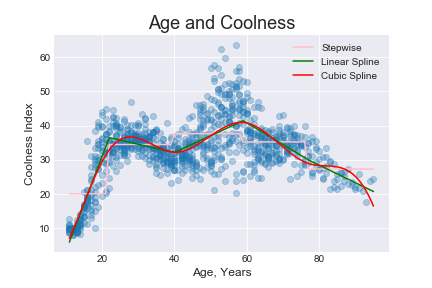

Text(0,0.5,'Coolness Index')

In [255]:
%matplotlib notebook
sns.set_style("darkgrid")
ax = sns.regplot(x=df_cool["age"], y=df_cool["coolness_index"], 
            fit_reg=False, 
            scatter_kws={'alpha':0.3}).set_title('Age and Coolness', fontsize=18)
plt.xlabel('Age, Years', fontsize=12)
plt.ylabel('Coolness Index', fontsize=12)

### b). Use ordinary least squares (OLS) regression to t a stepwise function to these data. Use 5 bins [11; 22), [22; 40), [40; 59), [59; 77), [77; 95]. Remember that your dummy variables must be integer type (0, 1), not boolean type (True, False). Plot this step function on top of the scatterplot of the data from part (a). Label your axes, include a legend, and give the plot a title.

In [256]:
coolness_index = df_cool['coolness_index']
age = df_cool['age']
#age_bin1 = (age < 11).astype(int)
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)
#age_bin7 = (age >= 95).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2, age_bin3=age_bin3, 
                           age_bin4=age_bin4, age_bin5=age_bin5,
                           ))
reg1 = sm.OLS(endog=coolness_index, exog=X_step, missing='drop')
reg1_results = reg1.fit()
print(reg1_results.summary())

                            OLS Regression Results                            
Dep. Variable:         coolness_index   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        05:42:11   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

In [257]:
expected_y = reg1_results.predict(X_step)
plt.plot(df_cool['age'], expected_y, color = 'pink', label='Stepwise')
plt.legend()

### Report your estimated step function values for each bin[1; 2; 3; 4; 5].

In [258]:
b_1, b_2, b_3, b_4, b_5 = reg1_results.params
print("Coefficients (Estimated Step Function Values):")
print("beta_1:", b_1)
print("beta_2:", b_2)
print("beta_3:", b_3)
print("beta_4:", b_4)
print("beta_5:", b_5)

print()
print("Corresponding Standard Errors:")
print(reg1_results.bse)

Coefficients (Estimated Step Function Values):
beta_1: 20.1024572521
beta_2: 34.4757880776
beta_3: 37.6351054924
beta_4: 35.2254000402
beta_5: 27.2963782443

Corresponding Standard Errors:
age_bin1    0.562375
age_bin2    0.430913
age_bin3    0.423751
age_bin4    0.485467
age_bin5    0.935616
dtype: float64


### What is the predicted coolness of a 73-year old from the stepwise function?

In [259]:
y = b_4
print("Fourth bin => Predicted coolness of a 73-year old:", y)

Fourth bin => Predicted coolness of a 73-year old: 35.2254000402


### Fit a linear spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LQUnivariateSpline function with k = 1 (linear) and the knots equal to t =[22,40,59,77]. Plot your continuous linear spline against a scatterplot of the data from part (a) and the esti- mated step function from part (b). Label your axes, include a legend, and give the plot a title.

In [260]:
from scipy.interpolate import LSQUnivariateSpline

knots = [22, 40, 59, 77]
spl_coolness = LSQUnivariateSpline(age.values, coolness_index.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
plt.plot(age_vec, spl_coolness(age_vec), color = 'green', label='Linear Spline')
plt.legend()

### What is the predicted coolness of a 73-year old from the linear spline?

In [261]:
print("Predicted coolness of a 73-year old:", spl_coolness(73))

Predicted coolness of a 73-year old: 32.536832389143306


### d). Fit a cubic spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LQUnivariateSpline function with k = 3 (cubic) and the knots equal to t =[22,40,59,77]. Plot your continuous cubic spline against a scatterplot of the data from part (a) and the estimated step function from part (b), and the linear spline from part (c). Label your axes, include a legend, and give the plot a title.

In [262]:
knots_2 = [22, 40, 59, 77]
spl_coolness_cubic = LSQUnivariateSpline(age.values, coolness_index.values, knots_2, k=3)

age_vec_2 = np.linspace(age.values.min(), age.values.max(), 1000)
plt.plot(age_vec_2, spl_coolness_cubic(age_vec_2), color = 'red', label='Cubic Spline')
plt.legend()

### What is the predicted coolness of a 73-year old from the cubic spline?

In [263]:
print("Predicted coolness of a 73-year old:", spl_coolness_cubic(73))

Predicted coolness of a 73-year old: 31.262429389257864
